In [4]:
from pandas import read_csv
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# 导入数据
filename = 'data/wine.data'
names = ['class', 'Alcohol', 'MalicAcid', 'Ash', 'AlclinityOfAsh', 'Magnesium', 'TotalPhenols', 'Flavanoids',
         'NonflayanoidPhenols', 'Proanthocyanins', 'ColorIntensiyt', 'Hue', 'OD280/OD315', 'Proline']
dataset = read_csv(filename, names=names)
dataset['class'] = dataset['class'].replace(to_replace=[1, 2, 3], value=[0, 1, 2])
array = dataset.values
X = array[:, 1:13]
y = array[:, 0]

# 数据降维
pca = PCA(n_components=3)
X_scale = StandardScaler().fit_transform(X)
X_reduce = pca.fit_transform(scale(X_scale))

# 模型训练
model = KMeans(n_clusters=3)
model.fit(X_reduce)
labels = model.labels_
centers = model.cluster_centers_
print(model.transform(X_reduce))

[[1.36018547 5.90667978 4.4443649 ]
 [2.31794959 5.30405954 3.09049919]
 [1.00254823 5.11395426 3.41395796]
 [2.11680766 6.12504462 5.19361953]
 [2.24573584 4.38125258 3.36567688]
 [1.18738783 5.27750262 4.15722093]
 [0.89277982 4.81421627 3.27947947]
 [0.76317838 4.37545948 3.19506791]
 [1.81578112 5.29712108 3.87954049]
 [1.14819339 5.39503405 3.70273151]
 [0.85324674 5.6514343  3.78420232]
 [1.42916278 4.2355949  2.40899706]
 [0.99128738 4.50456437 2.5420257 ]
 [1.65647258 6.01578135 4.34347053]
 [2.25414737 6.5676468  5.14330029]
 [0.7075078  4.62114913 3.3645578 ]
 [1.64480258 4.71464832 4.06419796]
 [1.23561921 4.48337688 3.4683473 ]
 [1.35755676 5.57366116 4.42293538]
 [0.68043836 4.82666877 3.57188645]
 [1.34576318 5.97443217 4.31264563]
 [1.32489395 4.06847858 2.3822659 ]
 [0.96353977 5.26489391 2.77089611]
 [1.59453809 4.60534803 1.68353186]
 [1.37160674 4.8196711  2.29557577]
 [4.02506541 5.49504492 4.58908423]
 [0.79463966 4.23447668 2.36464453]
 [2.25952143 4.05120413 1.76

In [5]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 2 2 0 2 2 0 2 0 2 0
 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [6]:
# 输出模型的准确度
print('%.3f   %.3f   %.3f   %.3f   %.3f    %.3f' %(
    metrics.homogeneity_score(y, labels),
    metrics.completeness_score(y, labels),
    metrics.v_measure_score(y, labels),
    metrics.adjusted_rand_score(y, labels),
    metrics.adjusted_mutual_info_score(y,  labels),
    # 轮廓到中心的距离
    metrics.silhouette_score(X_reduce, labels)))

0.735   0.731   0.733   0.740   0.728    0.413


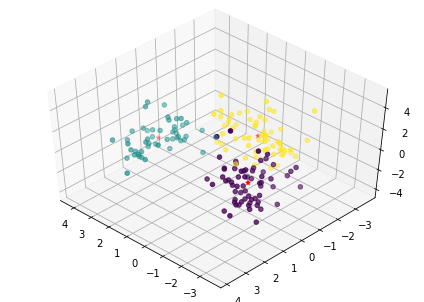

In [7]:
# 绘制模型的分布图
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], X_reduce[:, 2], c=labels.astype(np.float))
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='*', color='red')
plt.show()